# Activar R 

In [1]:
%load_ext rpy2.ipython


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


# Python

In [4]:
import pandas as pd

In [7]:
x = 42
print(x)

42


# R packages

In [2]:
%%R
install.packages(c("useful","cluster"),dependencies = TRUE)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to conso

## Clusering R

In [3]:
%%R
wineUrl <- 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' 

wine <- read.table(wineUrl, header=FALSE, sep=',',stringsAsFactors=FALSE, 
         col.names=c('Cultivar', 'Alcohol', 'Malic.acid', 
        'Ash', 'Alcalinity.of.ash', 'Magnesium', 'Total.phenols', 'Flavanoids', 'Nonflavanoid.phenols', 

        
                'Proanthocyanin', 'Color.intensity', 'Hue', 'OD280.OD315.of.diluted.wines', 'Proline' )) 



In [4]:
%%R
head(wine)

  Cultivar Alcohol Malic.acid  Ash Alcalinity.of.ash Magnesium Total.phenols
1        1   14.23       1.71 2.43              15.6       127          2.80
2        1   13.20       1.78 2.14              11.2       100          2.65
3        1   13.16       2.36 2.67              18.6       101          2.80
4        1   14.37       1.95 2.50              16.8       113          3.85
5        1   13.24       2.59 2.87              21.0       118          2.80
6        1   14.20       1.76 2.45              15.2       112          3.27
  Flavanoids Nonflavanoid.phenols Proanthocyanin Color.intensity  Hue
1       3.06                 0.28           2.29            5.64 1.04
2       2.76                 0.26           1.28            4.38 1.05
3       3.24                 0.30           2.81            5.68 1.03
4       3.49                 0.24           2.18            7.80 0.86
5       2.69                 0.39           1.82            4.32 1.04
6       3.39                 0.34        

In [4]:
%matplotlib inline
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [5]:
%%R
wineTrain <- wine[, which(names(wine) != "Cultivar")]

In [8]:
%%R
set.seed(278613) ###semilla
wineK3 <- kmeans(x=wineTrain, centers=3)

wineK3$cluster
#wineK3$size


  [1] 2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2
 [38] 1 2 2 2 2 2 3 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 3 3 3 3 3 3 3 3 3 2 2 2 3 3 2
 [75] 2 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2 2 3 3
[149] 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2 2 2 3


In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [5]:
wine = pd.read_csv('wine.csv',sep=';')
wine.head(10)

,Cultivar,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


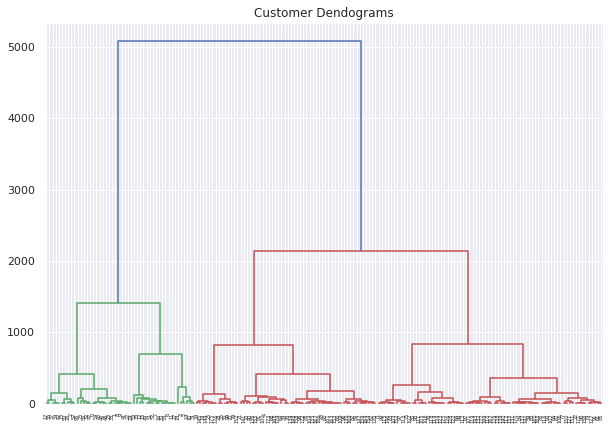

In [6]:
import scipy.cluster.hierarchy as shc
winetrain=wine.drop(['Cultivar'],axis=1)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(winetrain, method='ward'))

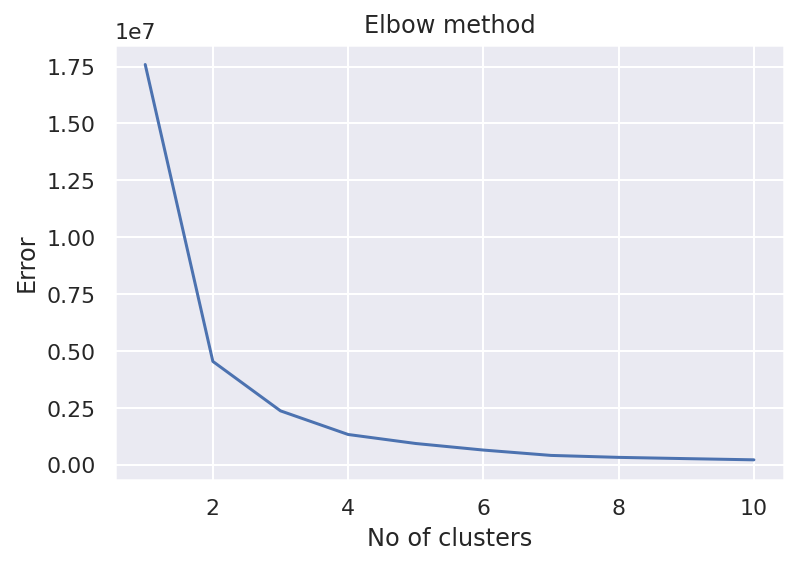

In [37]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(winetrain)
    kmeans.fit(winetrain)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [7]:
winetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic.acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity.of.ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total.phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid.phenols          178 non-null    float64
 8   Proanthocyanin                178 non-null    float64
 9   Color.intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280.OD315.of.diluted.wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [9]:
import os
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
fit = pd.Series(cluster.fit_predict(winetrain))
wine['cluster_ward'] = fit
tab = wine.groupby(
    'cluster_ward', as_index = False).aggregate({
     'Alcohol': [np.mean]
    ,'Malic.acid': [np.mean]
    ,'Ash': [np.mean]
    ,'Alcalinity.of.ash': [np.mean]
    ,'Magnesium': [np.mean]
    ,'Total.phenols': [np.mean]
    ,'Flavanoids': [np.mean]
    ,'Nonflavanoid.phenols': [np.mean]
    ,'Proanthocyanin': [np.mean]
    ,'Color.intensity': np.mean
    ,'Hue': [np.mean]
    ,'OD280.OD315.of.diluted.wines': [np.mean]
    ,'Proline': [np.mean]
})  
    
    
#tab.columns = [['Ward_group','Alcohol', 'Malic.acid', 'Ash', 'Alcalinity.of.ash', 'Magnesium', 'Total.phenols',
 #'Flavanoids', 'Nonflavanoid.phenols', 'Proanthocyanin', 'Color.intensity', 'Hue', 'OD280.OD315.of.diluted.wines','Proline']]tab

In [10]:
tab.head(5)


,cluster_ward,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.776667,1.875833,2.421458,17.064583,106.687500,2.859583,2.998750,0.286042,1.938958,5.637917,1.080000,3.103958,1189.770833
1,1,12.514444,2.515833,2.304028,20.823611,92.736111,2.053750,1.736944,0.391944,1.428056,4.102778,0.940556,2.471667,464.236111
2,2,12.961897,2.494655,2.398621,19.856897,102.689655,2.127586,1.589828,0.387241,1.505000,5.764138,0.877000,2.378103,731.258621


In [11]:
winetrain.head(5)

,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
wine.head(5)

,Cultivar,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline,cluster_ward
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [13]:
pd.crosstab(wine.Cultivar, wine.cluster_ward,margins=True)

cluster_ward,0,1,2,All
Cultivar,,,,
1,46,0,13,59
2,2,51,18,71
3,0,21,27,48
All,48,72,58,178


## PCA

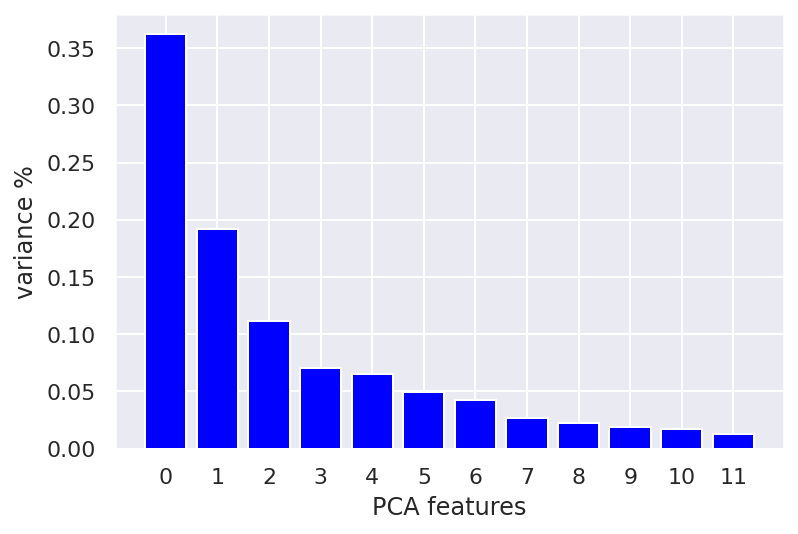

In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Estandarizamos
X_std = StandardScaler().fit_transform(winetrain)
#crear pca
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [15]:
PCA_components.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664


In [16]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # PCA with 2 primary components
pca_3 = PCA(n_components=3) #PCA with 3 primary components

# fit and transform both PCA models
X_pca = pca.fit_transform(X_std)
X_pca_3 = pca_3.fit_transform(X_std)

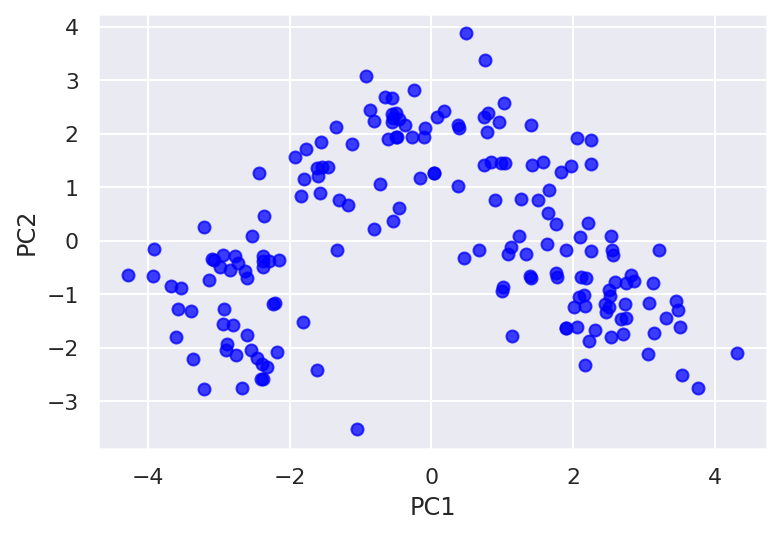

In [19]:
plt.scatter(X_pca.T[0], X_pca.T[1], alpha=0.75, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

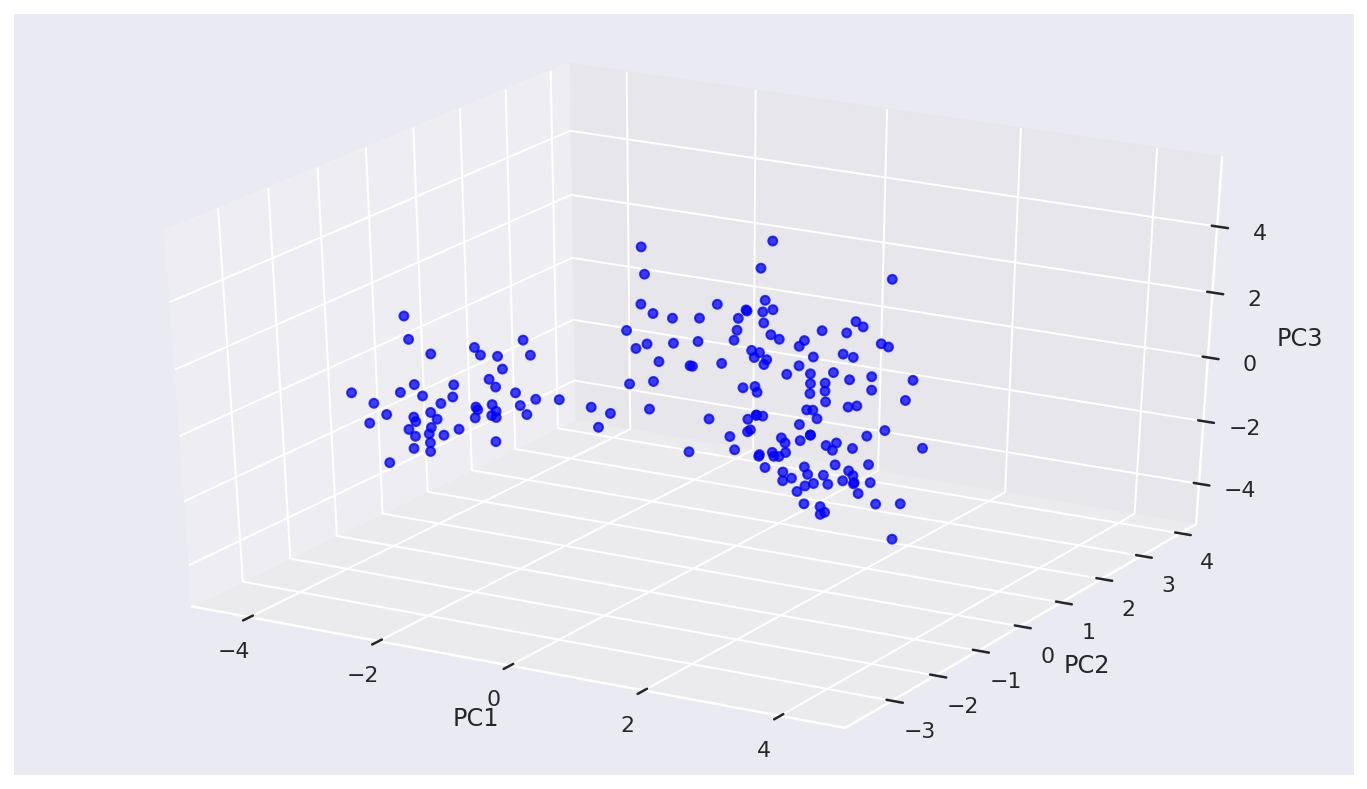

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# initialize figure and 3d projection for the PC3 data
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

# assign x,y,z coordinates from PC1, PC2 & PC3
xs = X_pca_3.T[0]
ys = X_pca_3.T[1]
zs = X_pca_3.T[2]

# initialize scatter plot and label axes
ax.scatter(xs, ys, zs, alpha=0.75, c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [28]:
ax.scatter(xs, ys, zs, alpha=0.75,
                  c=wine['cluster_ward'], cmap='viridis', depthshade=True)


#fig.colorbar(plot, shrink=0.6, aspect=9)
plt.show()

In [37]:
winetrain = wine.iloc[:,2: ].values
winetrain

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km3 = km.fit_predict(X_pca)

In [35]:
print(y_km3)

km.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([[ 2.28888211, -0.95994724],
       [-2.74392982, -1.2141906 ],
       [-0.07601834,  1.73606061]])

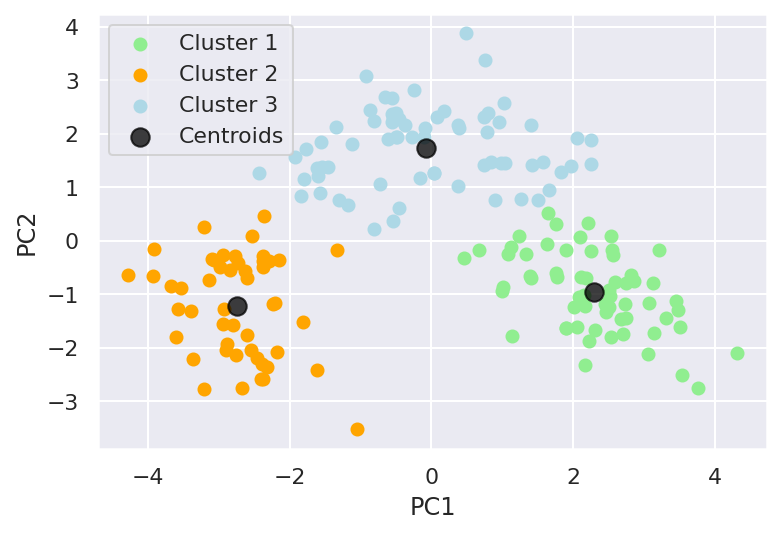

In [36]:
plt.scatter(X_pca[y_km3==0, 0],
           X_pca[y_km3==0, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_km3==1, 0],
           X_pca[y_km3==1, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_km3==2, 0],
           X_pca[y_km3==2, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=85,
           alpha=0.75,
           marker='o',
           c='black',
           label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [38]:
wine['k_means_pca'] = y_km3

In [39]:
wine.head(4)

,Cultivar,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline,cluster_ward,k_means_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0


In [40]:
pd.crosstab(wine.Cultivar, wine.k_means_pca,margins=True)

k_means_pca,0,1,2,All
Cultivar,,,,
1,58,0,1,59
2,3,1,67,71
3,0,48,0,48
All,61,49,68,178


# DBSCAN ALTERNATIVE A CLUSTERING METHOD

In [45]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.75,
             min_samples=3)

y_dbs = dbs.fit_predict(X_pca)

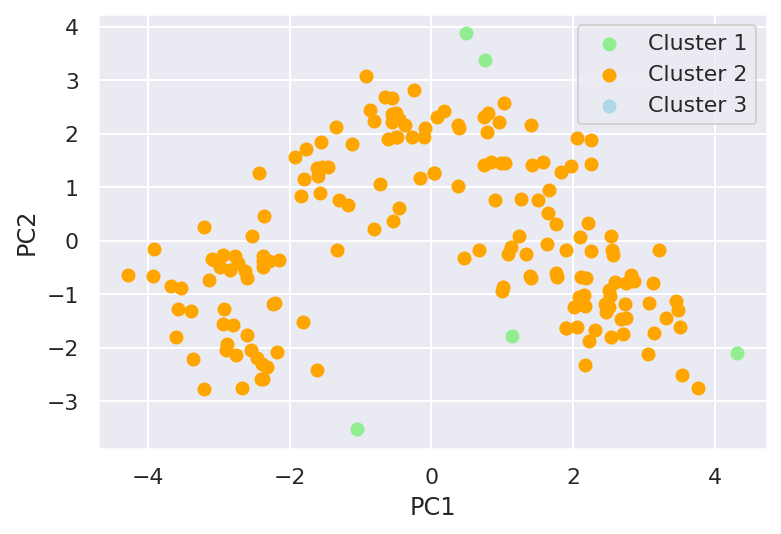

In [46]:
plt.scatter(X_pca[y_dbs==-1, 0],
           X_pca[y_dbs==-1, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_dbs==0, 0],
           X_pca[y_dbs==0, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_dbs==1, 0],
           X_pca[y_dbs==1, 1],
           c='lightblue',
           label='Cluster 3')
#plt.scatter(X_pca[y_dbs==2, 0],
#           X_pca[y_dbs==2, 1],
#           c='yellow',
#           label='Cluster 4')
#plt.scatter(X_pca[y_dbs==3, 0],
#           X_pca[y_dbs==3, 1],
#           c='pink',
#           label='Cluster 5')
#plt.scatter(X_pca[y_dbs==4, 0],
#           X_pca[y_dbs==4, 1],
#           c='purple',
#           label='Cluster 6')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [47]:
wine['k_dbscan_pca'] = y_dbs

In [48]:
pd.crosstab(wine.Cultivar, wine.k_dbscan_pca,margins=True)

k_dbscan_pca,-1,0,All
Cultivar,,,
1,2,57,59
2,2,69,71
3,1,47,48
All,5,173,178
